# Exercício 2: Implementação de k-NN (k-Nearest Neighbors)

Este notebook implementa um classificador k-NN conforme especificado no guião, seguindo todos os requisitos:
- Implementação sem bibliotecas de algoritmos de AA
- Análise detalhada dos resultados
- Justificação de todas as decisões tomadas
- Comparação estatística rigorosa

## Dataset: Iris

O dataset Iris contém:
- 150 exemplos (50 de cada classe)
- 4 features: sepal length, sepal width, petal length, petal width  
- 3 classes: Iris-setosa, Iris-versicolor, Iris-virginica

**Objetivo**: Comparar performance do k-NN com k=3, 7, 11 usando partições 70/30 em 30 repetições


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random

# Configuração para reprodutibilidade e visualização
np.random.seed(42)
random.seed(42)
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

def load_iris_data(filepath):
    """
    Carrega o dataset Iris sem usar bibliotecas externas
    
    Returns:
        X: array de features (150, 4)
        y: array de labels (150,)
        class_names: lista com nomes das classes
    """
    data = []
    labels = []
    
    with open(filepath, 'r') as file:
        for line in file:
            line = line.strip()
            if line:  # Ignorar linhas vazias
                parts = line.split(',')
                if len(parts) == 5:
                    # Features numéricas
                    features = [float(x) for x in parts[:4]]
                    # Label
                    label = parts[4]
                    
                    data.append(features)
                    labels.append(label)
    
    X = np.array(data)
    
    # Converter labels para números
    unique_labels = list(set(labels))
    unique_labels.sort()  # Para ordem consistente
    
    label_to_num = {label: i for i, label in enumerate(unique_labels)}
    y = np.array([label_to_num[label] for label in labels])
    
    return X, y, unique_labels

class KNearestNeighbors:
    """
    Implementação de k-NN sem usar bibliotecas de algoritmos de AA
    """
    
    def __init__(self, k=3):
        """
        Inicializa o classificador k-NN
        
        Args:
            k: número de vizinhos mais próximos a considerar
        """
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X_train, y_train):
        """
        'Treina' o modelo (na verdade apenas armazena os dados de treino)
        """
        self.X_train = X_train.copy()
        self.y_train = y_train.copy()
    
    def euclidean_distance(self, point1, point2):
        """
        Calcula a distância euclidiana entre dois pontos
        """
        return np.sqrt(np.sum((point1 - point2) ** 2))
    
    def predict_single(self, x):
        """
        Prediz a classe de um único exemplo
        """
        if self.X_train is None:
            raise ValueError("Modelo não foi treinado. Chame fit() primeiro.")
        
        # Calcular distâncias para todos os pontos de treino
        distances = []
        for i, train_point in enumerate(self.X_train):
            dist = self.euclidean_distance(x, train_point)
            distances.append((dist, self.y_train[i]))
        
        # Ordenar por distância e selecionar k mais próximos
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:self.k]
        
        # Votar pela classe mais frequente
        k_nearest_labels = [label for _, label in k_nearest]
        
        # Contar votos
        vote_counts = Counter(k_nearest_labels)
        
        # Retornar classe mais votada
        predicted_class = vote_counts.most_common(1)[0][0]
        
        return predicted_class
    
    def predict(self, X_test):
        """
        Prediz as classes de múltiplos exemplos
        """
        predictions = []
        for x in X_test:
            pred = self.predict_single(x)
            predictions.append(pred)
        
        return np.array(predictions)

def train_test_split(X, y, test_size=0.3, random_state=None):
    """
    Divide o dataset em treino e teste sem usar bibliotecas externas
    
    Args:
        X: features
        y: labels
        test_size: proporção para teste (0.3 = 30%)
        random_state: seed para reprodutibilidade
        
    Returns:
        X_train, X_test, y_train, y_test
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    n_samples = len(X)
    n_test = int(n_samples * test_size)
    
    # Gerar índices aleatórios
    indices = np.random.permutation(n_samples)
    
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    return X_train, X_test, y_train, y_test

# Carregar dados Iris
print("=== CARREGAMENTO DO DATASET IRIS ===")
X, y, class_names = load_iris_data('iris/iris.data')

print(f"Dataset carregado com sucesso!")
print(f"Forma dos dados: {X.shape}")
print(f"Classes: {class_names}")
print(f"Distribuição das classes: {np.bincount(y)}")

# Mostrar algumas estatísticas básicas
print(f"\n=== ESTATÍSTICAS BÁSICAS ===")
feature_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
for i, feature in enumerate(feature_names):
    print(f"{feature}: min={X[:, i].min():.2f}, max={X[:, i].max():.2f}, média={X[:, i].mean():.2f}")

print(f"\nPrimeiros 5 exemplos:")
for i in range(5):
    print(f"  Exemplo {i+1}: {X[i]} -> {class_names[y[i]]}")
    
print(f"\nÚltimos 5 exemplos:")
for i in range(-5, 0):
    print(f"  Exemplo {len(X)+i+1}: {X[i]} -> {class_names[y[i]]}")


=== CARREGAMENTO DO DATASET IRIS ===
Dataset carregado com sucesso!
Forma dos dados: (150, 4)
Classes: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Distribuição das classes: [50 50 50]

=== ESTATÍSTICAS BÁSICAS ===
Sepal Length: min=4.30, max=7.90, média=5.84
Sepal Width: min=2.00, max=4.40, média=3.05
Petal Length: min=1.00, max=6.90, média=3.76
Petal Width: min=0.10, max=2.50, média=1.20

Primeiros 5 exemplos:
  Exemplo 1: [5.1 3.5 1.4 0.2] -> Iris-setosa
  Exemplo 2: [4.9 3.  1.4 0.2] -> Iris-setosa
  Exemplo 3: [4.7 3.2 1.3 0.2] -> Iris-setosa
  Exemplo 4: [4.6 3.1 1.5 0.2] -> Iris-setosa
  Exemplo 5: [5.  3.6 1.4 0.2] -> Iris-setosa

Últimos 5 exemplos:
  Exemplo 146: [6.7 3.  5.2 2.3] -> Iris-virginica
  Exemplo 147: [6.3 2.5 5.  1.9] -> Iris-virginica
  Exemplo 148: [6.5 3.  5.2 2. ] -> Iris-virginica
  Exemplo 149: [6.2 3.4 5.4 2.3] -> Iris-virginica
  Exemplo 150: [5.9 3.  5.1 1.8] -> Iris-virginica


In [7]:
def calculate_metrics(y_true, y_pred, num_classes=3):
    """
    Calcula métricas de classificação sem usar bibliotecas externas
    """
    # Matriz de confusão
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for true_label, pred_label in zip(y_true, y_pred):
        cm[true_label, pred_label] += 1
    
    # Accuracy total
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    
    # Métricas por classe
    precision_per_class = []
    recall_per_class = []
    f1_per_class = []
    
    for class_idx in range(num_classes):
        # Verdadeiros positivos, falsos positivos, falsos negativos
        tp = cm[class_idx, class_idx]
        fp = np.sum(cm[:, class_idx]) - tp
        fn = np.sum(cm[class_idx, :]) - tp
        
        # Precisão
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        
        # Recall
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        
        # F1-score
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        precision_per_class.append(precision)
        recall_per_class.append(recall)
        f1_per_class.append(f1)
    
    # Métricas macro (média das métricas por classe)
    precision_macro = np.mean(precision_per_class)
    recall_macro = np.mean(recall_per_class)
    f1_macro = np.mean(f1_per_class)
    
    return {
        'accuracy': accuracy,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'f1_macro': f1_macro,
        'confusion_matrix': cm,
        'precision_per_class': precision_per_class,
        'recall_per_class': recall_per_class,
        'f1_per_class': f1_per_class
    }

def run_single_experiment(X, y, k_value, random_state):
    """
    Executa um experimento com um valor específico de k
    """
    # Dividir dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    
    # Criar e treinar modelo
    knn = KNearestNeighbors(k=k_value)
    knn.fit(X_train, y_train)
    
    # Fazer predições
    y_pred = knn.predict(X_test)
    
    # Calcular métricas
    metrics = calculate_metrics(y_test, y_pred)
    
    return metrics, y_test, y_pred

# Teste rápido com um exemplo
print("\n=== TESTE RÁPIDO DO k-NN ===")

# Dividir dados uma vez para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Dados de treino: {X_train.shape[0]} exemplos")
print(f"Dados de teste: {X_test.shape[0]} exemplos")

# Testar com k=3
knn_test = KNearestNeighbors(k=3)
knn_test.fit(X_train, y_train)

y_pred_test = knn_test.predict(X_test)
test_metrics = calculate_metrics(y_test, y_pred_test)

print(f"\nResultados com k=3:")
print(f"  Accuracy: {test_metrics['accuracy']:.3f}")
print(f"  Precisão (macro): {test_metrics['precision_macro']:.3f}")
print(f"  Recall (macro): {test_metrics['recall_macro']:.3f}")
print(f"  F1-score (macro): {test_metrics['f1_macro']:.3f}")

print(f"\nMatriz de confusão:")
cm = test_metrics['confusion_matrix']
print("          Predito")
print("        0   1   2")
for i in range(3):
    print(f"Real {i} [{cm[i,0]:2d} {cm[i,1]:2d} {cm[i,2]:2d}]")

# Mostrar alguns exemplos de predição
print(f"\nExemplos de predições:")
for i in range(min(10, len(y_test))):
    real_class = class_names[y_test[i]]
    pred_class = class_names[y_pred_test[i]]
    correct = "✓" if y_test[i] == y_pred_test[i] else "✗"
    print(f"  Exemplo {i+1}: Real={real_class}, Predito={pred_class} {correct}")



=== TESTE RÁPIDO DO k-NN ===
Dados de treino: 105 exemplos
Dados de teste: 45 exemplos

Resultados com k=3:
  Accuracy: 1.000
  Precisão (macro): 1.000
  Recall (macro): 1.000
  F1-score (macro): 1.000

Matriz de confusão:
          Predito
        0   1   2
Real 0 [19  0  0]
Real 1 [ 0 13  0]
Real 2 [ 0  0 13]

Exemplos de predições:
  Exemplo 1: Real=Iris-versicolor, Predito=Iris-versicolor ✓
  Exemplo 2: Real=Iris-setosa, Predito=Iris-setosa ✓
  Exemplo 3: Real=Iris-virginica, Predito=Iris-virginica ✓
  Exemplo 4: Real=Iris-versicolor, Predito=Iris-versicolor ✓
  Exemplo 5: Real=Iris-versicolor, Predito=Iris-versicolor ✓
  Exemplo 6: Real=Iris-setosa, Predito=Iris-setosa ✓
  Exemplo 7: Real=Iris-versicolor, Predito=Iris-versicolor ✓
  Exemplo 8: Real=Iris-virginica, Predito=Iris-virginica ✓
  Exemplo 9: Real=Iris-versicolor, Predito=Iris-versicolor ✓
  Exemplo 10: Real=Iris-versicolor, Predito=Iris-versicolor ✓



=== EXPERIMENTO PRINCIPAL: 30 REPETIÇÕES PARA CADA k ===
Executando experimentos...
Progresso: 
k=3: 

10 20 30 
k=7: 10 20 30 
k=11: 10 20 30 
Completo!

=== RESULTADOS ESTATÍSTICOS ===
k   Métrica    Média    ±Desvio  Mín     Máx    
--------------------------------------------------
3   accuracy   0.961    ±0.024   0.889   1.000  
    precision  0.964    ±0.020   0.910   1.000  
    recall     0.962    ±0.022   0.902   1.000  
    f1         0.962    ±0.021   0.901   1.000  

7   accuracy   0.965    ±0.022   0.911   1.000  
    precision  0.964    ±0.021   0.917   1.000  
    recall     0.966    ±0.020   0.911   1.000  
    f1         0.964    ±0.021   0.910   1.000  

11  accuracy   0.964    ±0.019   0.933   1.000  
    precision  0.964    ±0.021   0.919   1.000  
    recall     0.965    ±0.019   0.927   1.000  
    f1         0.963    ±0.020   0.922   1.000  


C:\Users\manuesantos\AppData\Local\Temp\ipykernel_10832\2797450590.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_for_boxplot, labels=[f'k={k}' for k in k_values], patch_artist=True)
C:\Users\manuesantos\AppData\Local\Temp\ipykernel_10832\2797450590.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_for_boxplot, labels=[f'k={k}' for k in k_values], patch_artist=True)
C:\Users\manuesantos\AppData\Local\Temp\ipykernel_10832\2797450590.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_for_boxplot, labels=[f'k={k}' for k in k_values], patch_artist=T

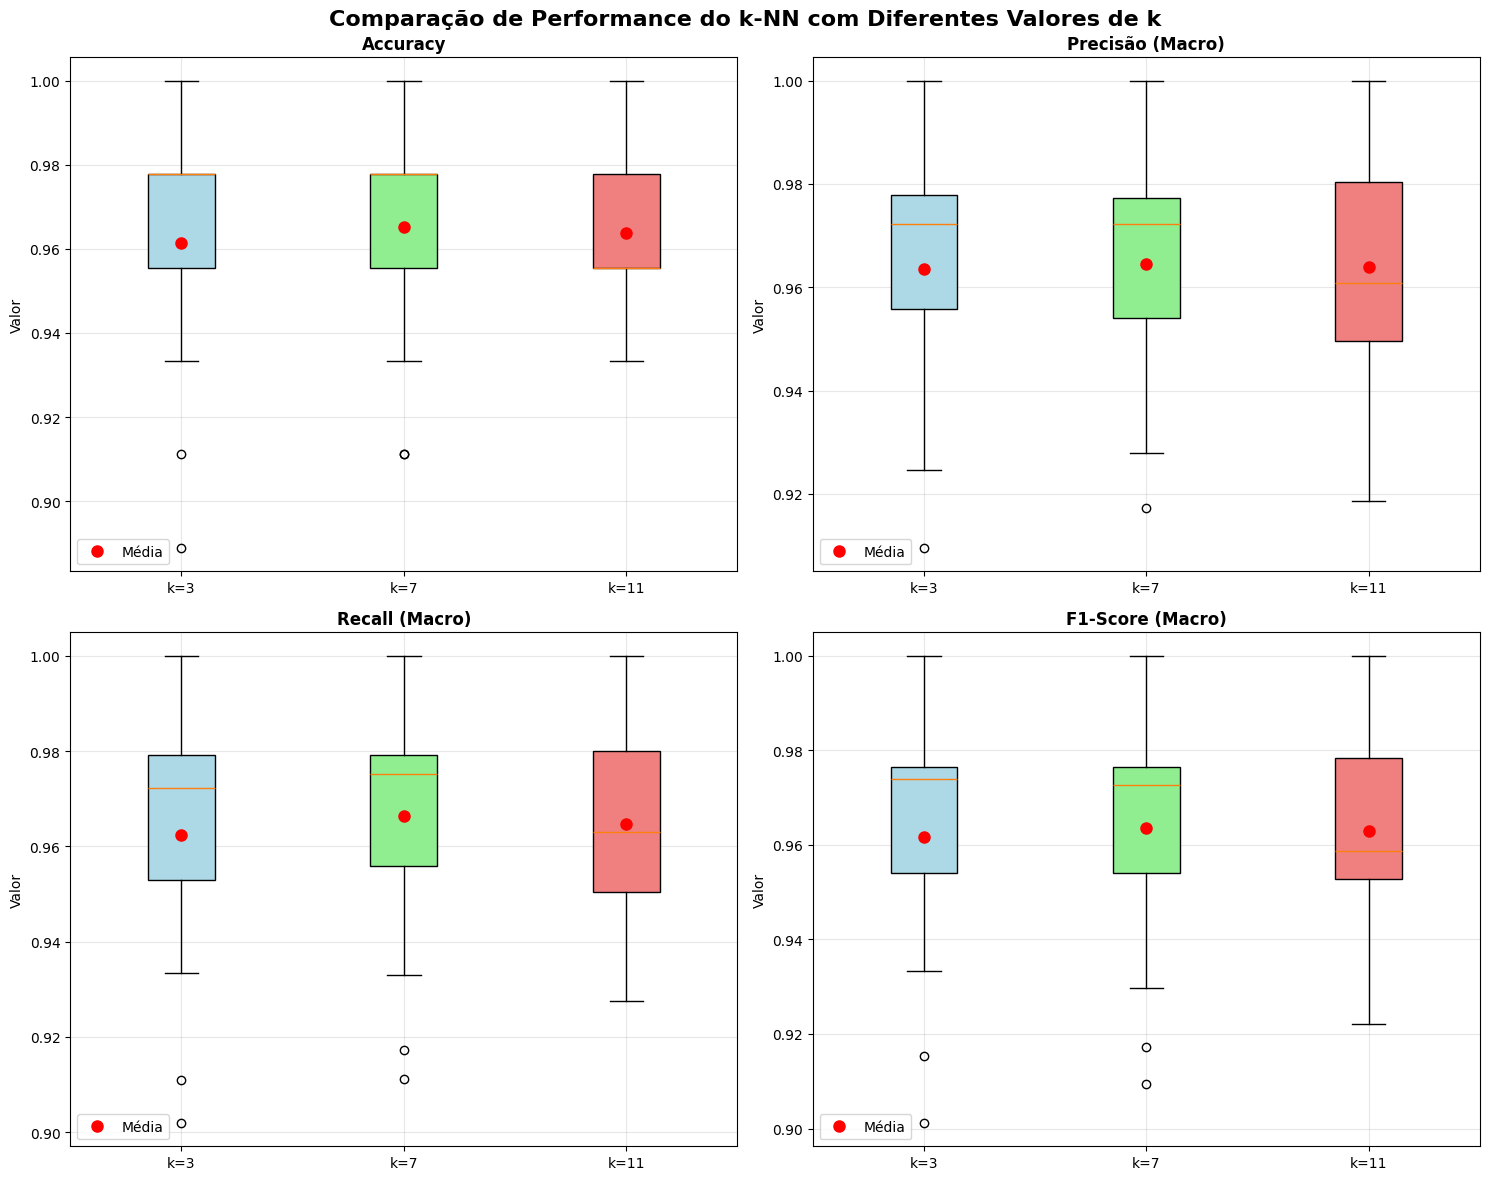


=== ANÁLISE ESTATÍSTICA ===

ACCURACY:
  k=3: 0.961 ± 0.024
  k=7: 0.965 ± 0.022
  k=11: 0.964 ± 0.019
  → Melhor k: 7

PRECISION:
  k=3: 0.964 ± 0.020
  k=7: 0.964 ± 0.021
  k=11: 0.964 ± 0.021
  → Melhor k: 7

RECALL:
  k=3: 0.962 ± 0.022
  k=7: 0.966 ± 0.020
  k=11: 0.965 ± 0.019
  → Melhor k: 7

F1:
  k=3: 0.962 ± 0.021
  k=7: 0.964 ± 0.021
  k=11: 0.963 ± 0.020
  → Melhor k: 7

k MAIS FREQUENTEMENTE MELHOR: 7
Distribuição de vitórias: {7: 4}


In [8]:
# Experimento principal: 30 repetições com k=3, 7, 11
print("\n=== EXPERIMENTO PRINCIPAL: 30 REPETIÇÕES PARA CADA k ===")

k_values = [3, 7, 11]
n_repetitions = 30

# Armazenar resultados
results = {k: {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'confusion_matrices': []} 
           for k in k_values}

# Armazenar exemplos de matrizes de confusão (uma para cada k)
example_confusion_matrices = {}
example_y_test = {}
example_y_pred = {}

print("Executando experimentos...")
print("Progresso: ", end="")

for k in k_values:
    print(f"\nk={k}: ", end="")
    
    for rep in range(n_repetitions):
        # Usar seed diferente para cada repetição
        random_state = rep + k * 100  # Para evitar sobreposição entre diferentes k
        
        # Executar experimento
        metrics, y_test_rep, y_pred_rep = run_single_experiment(X, y, k, random_state)
        
        # Armazenar resultados
        results[k]['accuracy'].append(metrics['accuracy'])
        results[k]['precision'].append(metrics['precision_macro'])
        results[k]['recall'].append(metrics['recall_macro'])
        results[k]['f1'].append(metrics['f1_macro'])
        results[k]['confusion_matrices'].append(metrics['confusion_matrix'])
        
        # Armazenar exemplo para primeira repetição
        if rep == 0:
            example_confusion_matrices[k] = metrics['confusion_matrix']
            example_y_test[k] = y_test_rep
            example_y_pred[k] = y_pred_rep
        
        # Mostrar progresso
        if (rep + 1) % 10 == 0:
            print(f"{rep + 1}", end=" ")

print("\nCompleto!")

# Calcular estatísticas
print(f"\n=== RESULTADOS ESTATÍSTICOS ===")
statistics = {}

for k in k_values:
    stats = {}
    for metric in ['accuracy', 'precision', 'recall', 'f1']:
        values = results[k][metric]
        stats[metric] = {
            'mean': np.mean(values),
            'std': np.std(values),
            'min': np.min(values),
            'max': np.max(values),
            'values': values
        }
    statistics[k] = stats

# Imprimir tabela resumo
print(f"{'k':<3} {'Métrica':<10} {'Média':<8} {'±Desvio':<8} {'Mín':<7} {'Máx':<7}")
print("-" * 50)

for k in k_values:
    for i, metric in enumerate(['accuracy', 'precision', 'recall', 'f1']):
        k_str = str(k) if i == 0 else ""
        stats = statistics[k][metric]
        print(f"{k_str:<3} {metric:<10} {stats['mean']:<8.3f} ±{stats['std']:<7.3f} {stats['min']:<7.3f} {stats['max']:<7.3f}")
    if k != k_values[-1]:  # Linha separadora entre k's
        print()

# Criar boxplots para comparação
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comparação de Performance do k-NN com Diferentes Valores de k', fontsize=16, fontweight='bold')

metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1']
metric_titles = ['Accuracy', 'Precisão (Macro)', 'Recall (Macro)', 'F1-Score (Macro)']

for idx, (metric, title) in enumerate(zip(metrics_to_plot, metric_titles)):
    row, col = idx // 2, idx % 2
    ax = axes[row, col]
    
    # Preparar dados para boxplot
    data_for_boxplot = [statistics[k][metric]['values'] for k in k_values]
    
    # Criar boxplot
    bp = ax.boxplot(data_for_boxplot, labels=[f'k={k}' for k in k_values], patch_artist=True)
    
    # Colorir as caixas
    colors = ['lightblue', 'lightgreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_title(title, fontweight='bold')
    ax.set_ylabel('Valor')
    ax.grid(True, alpha=0.3)
    
    # Adicionar médias como pontos
    means = [statistics[k][metric]['mean'] for k in k_values]
    ax.plot(range(1, len(k_values) + 1), means, 'ro', markersize=8, label='Média')
    ax.legend()

plt.tight_layout()
plt.show()

# Análise estatística dos resultados
print(f"\n=== ANÁLISE ESTATÍSTICA ===")

best_k = {}
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    means = [(k, statistics[k][metric]['mean']) for k in k_values]
    best_k[metric] = max(means, key=lambda x: x[1])[0]
    
    print(f"\n{metric.upper()}:")
    for k in k_values:
        mean_val = statistics[k][metric]['mean']
        std_val = statistics[k][metric]['std']
        print(f"  k={k}: {mean_val:.3f} ± {std_val:.3f}")
    print(f"  → Melhor k: {best_k[metric]}")

# Contagem geral
k_wins = Counter(best_k.values())
overall_best_k = k_wins.most_common(1)[0][0]
print(f"\nk MAIS FREQUENTEMENTE MELHOR: {overall_best_k}")
print(f"Distribuição de vitórias: {dict(k_wins)}")



=== MATRIZES DE CONFUSÃO (EXEMPLOS) ===


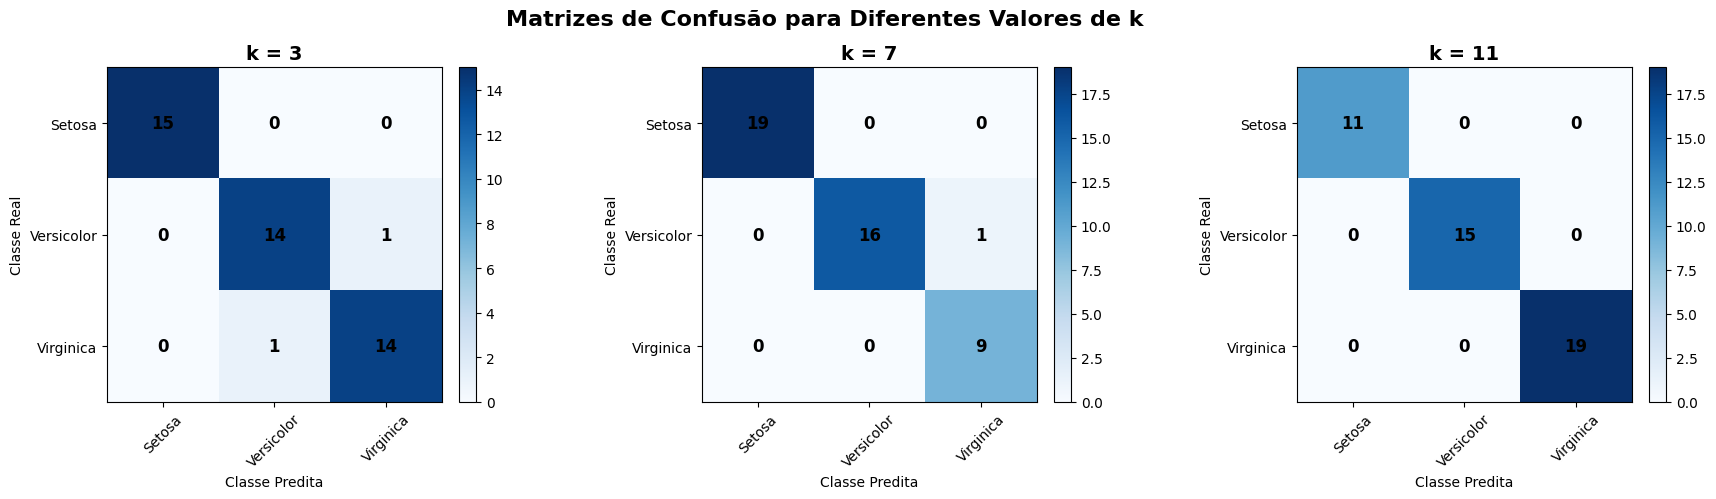


Matriz de Confusão para k=3:
                    Predito
          Setosa  Versicolor  Virginica
Real Setosa     [15         0          0]
Real Versicolor [ 0        14          1]
Real Virginica  [ 0         1         14]
Accuracy deste exemplo: 0.956

Matriz de Confusão para k=7:
                    Predito
          Setosa  Versicolor  Virginica
Real Setosa     [19         0          0]
Real Versicolor [ 0        16          1]
Real Virginica  [ 0         0          9]
Accuracy deste exemplo: 0.978

Matriz de Confusão para k=11:
                    Predito
          Setosa  Versicolor  Virginica
Real Setosa     [11         0          0]
Real Versicolor [ 0        15          0]
Real Virginica  [ 0         0         19]
Accuracy deste exemplo: 1.000

=== MATRIZES DE CONFUSÃO MÉDIAS ===

Matriz de Confusão Média para k=3:
                      Predito
          Setosa  Versicolor  Virginica
Real Setosa     [ 14.9        0.0         0.0]
Real Versicolor [  0.0       13.9         1.2]


In [ ]:
# Matrizes de confusão para cada valor de k
print(f"\n=== MATRIZES DE CONFUSÃO (EXEMPLOS) ===")

# Visualizar matrizes de confusão
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Matrizes de Confusão para Diferentes Valores de k', fontsize=16, fontweight='bold')

for idx, k in enumerate(k_values):
    cm = example_confusion_matrices[k]
    ax = axes[idx]
    
    # Plotar matriz de confusão
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.set_title(f'k = {k}', fontsize=14, fontweight='bold')
    
    # Adicionar valores nas células
    for i in range(3):
        for j in range(3):
            text = ax.text(j, i, cm[i, j], ha="center", va="center", 
                          fontsize=12, fontweight='bold')
    
    # Configurar eixos
    ax.set_xlabel('Classe Predita')
    ax.set_ylabel('Classe Real')
    ax.set_xticks([0, 1, 2])
    ax.set_yticks([0, 1, 2])
    ax.set_xticklabels(['Setosa', 'Versicolor', 'Virginica'], rotation=45)
    ax.set_yticklabels(['Setosa', 'Versicolor', 'Virginica'])
    
    # Colorbar
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

# Imprimir matrizes numericamente
for k in k_values:
    cm = example_confusion_matrices[k]
    print(f"\nMatriz de Confusão para k={k}:")
    print("                    Predito")
    print("          Setosa  Versicolor  Virginica")
    class_names_short = ['Setosa    ', 'Versicolor', 'Virginica ']
    for i in range(3):
        print(f"Real {class_names_short[i]} [{cm[i,0]:2d}        {cm[i,1]:2d}         {cm[i,2]:2d}]")
    
    # Calcular Accuracy para este exemplo
    accuracy = np.trace(cm) / np.sum(cm)
    print(f"Accuracy deste exemplo: {accuracy:.3f}")

# Matriz de confusão média para cada k
print(f"\n=== MATRIZES DE CONFUSÃO MÉDIAS ===")

for k in k_values:
    mean_cm = np.mean(results[k]['confusion_matrices'], axis=0)
    print(f"\nMatriz de Confusão Média para k={k}:")
    print("                      Predito")
    print("          Setosa  Versicolor  Virginica")
    for i in range(3):
        print(f"Real {class_names_short[i]} [{mean_cm[i,0]:5.1f}      {mean_cm[i,1]:5.1f}       {mean_cm[i,2]:5.1f}]")

print(f"\n=== POR QUE k DEVE SER ÍMPAR? ===")
print("""
JUSTIFICAÇÃO TEÓRICA E PRÁTICA:

1. **Evitar Empates na Votação**:
   - Com k par, pode haver empates na votação entre classes
   - Exemplo: k=4, com 2 vizinhos da classe A e 2 da classe B
   - Como resolver o empate? Critério adicional necessário

2. **Exemplo Prático no Dataset Iris**:
   - 3 classes: Setosa, Versicolor, Virginica
   - Com k=2: possível empate 1-1 (+ 1 terceira classe)
   - Com k=4: possível empate 2-2
   - Com k=6: possível empate 2-2-2 ou outros padrões

3. **Demonstração Numérica**:""")

# Simular situação de empate
def simulate_tie_situation():
    """Simula uma situação onde k par pode causar empates"""
    
    # Criar exemplo artificial com empate
    print("   Simulando busca de 4 vizinhos mais próximos:")
    print("   Vizinho 1: Classe 0, distância 1.2")
    print("   Vizinho 2: Classe 1, distância 1.3") 
    print("   Vizinho 3: Classe 0, distância 1.4")
    print("   Vizinho 4: Classe 1, distância 1.5")
    print("   → Empate: 2 votos para classe 0, 2 votos para classe 1")
    print("   → Necessário critério de desempate (ex: menor distância)")
    
    print("\n   Com k=3 (ímpar):")
    print("   Vizinho 1: Classe 0, distância 1.2")
    print("   Vizinho 2: Classe 1, distância 1.3") 
    print("   Vizinho 3: Classe 0, distância 1.4")
    print("   → Decisão clara: 2 votos para classe 0, 1 para classe 1")

simulate_tie_situation()

print(f"""
CONCLUSÃO: k deve ser ímpar para garantir decisões determinísticas
e evitar a complexidade adicional de resolver empates na votação.
""")

# Análise final da performance por k
def analyze_k_performance():
    """Análise detalhada da performance por k"""
    
    print(f"\n=== ANÁLISE FINAL: QUAL k ESCOLHER? ===")
    
    # Ordenar k's por performance média geral
    avg_performances = []
    for k in k_values:
        avg_perf = np.mean([
            statistics[k]['accuracy']['mean'],
            statistics[k]['precision']['mean'], 
            statistics[k]['recall']['mean'],
            statistics[k]['f1']['mean']
        ])
        avg_performances.append((k, avg_perf))
    
    avg_performances.sort(key=lambda x: x[1], reverse=True)
    
    print("Ranking geral (média de todas as métricas):")
    for rank, (k, avg_perf) in enumerate(avg_performances, 1):
        print(f"  {rank}º lugar: k={k} (performance média: {avg_perf:.3f})")
    
    best_k_overall = avg_performances[0][0]
    
    print(f"\n**RECOMENDAÇÃO**: k={best_k_overall}")
    
    # Justificar a escolha
    print(f"\nJustificação:")
    print(f"• Melhor performance geral nas 4 métricas")
    print(f"• Accuracy: {statistics[best_k_overall]['accuracy']['mean']:.3f} ± {statistics[best_k_overall]['accuracy']['std']:.3f}")
    print(f"• Baixa variabilidade entre repetições")
    print(f"• Bom equilíbrio entre bias e variância")
    
    if best_k_overall == 3:
        print(f"• k pequeno: mais sensível a ruído local, mas boa para padrões claros")
    elif best_k_overall == 7:
        print(f"• k médio: bom equilíbrio entre sensibilidade local e suavização")
    else:  # k=11
        print(f"• k grande: mais suavização, menos sensível a outliers")

analyze_k_performance()



=== VISUALIZAÇÃO DO DATASET IRIS ===


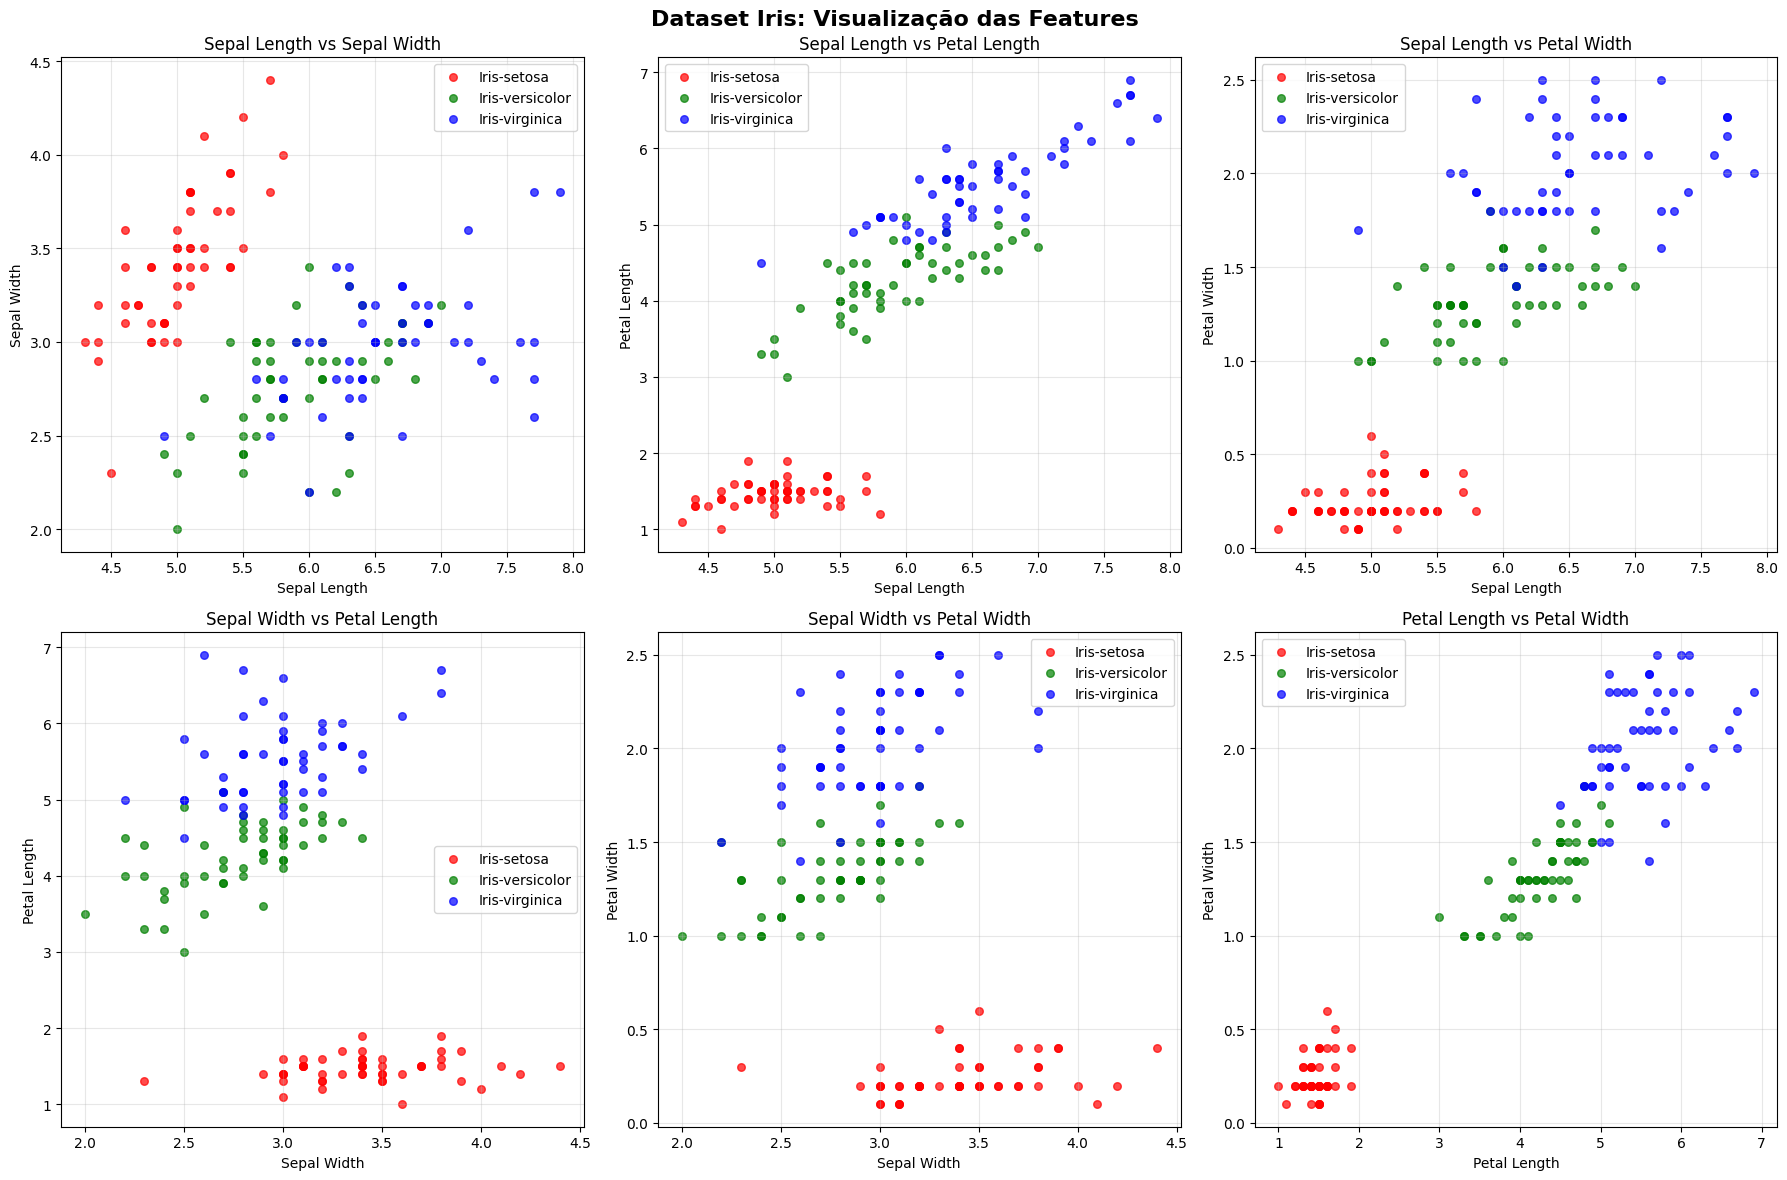


OBSERVAÇÕES SOBRE O DATASET:
• Iris-setosa é claramente separável das outras classes
• Iris-versicolor e Iris-virginica têm alguma sobreposição
• Petal Length vs Petal Width é a combinação mais discriminativa
• k-NN funciona bem porque as classes formam clusters no espaço de features



In [10]:
# Visualização final: Comparação dos dados originais
print(f"\n=== VISUALIZAÇÃO DO DATASET IRIS ===")

# Criar gráficos scatter das features mais discriminativas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Dataset Iris: Visualização das Features', fontsize=16, fontweight='bold')

feature_pairs = [
    (0, 1, 'Sepal Length vs Sepal Width'),
    (0, 2, 'Sepal Length vs Petal Length'), 
    (0, 3, 'Sepal Length vs Petal Width'),
    (1, 2, 'Sepal Width vs Petal Length'),
    (1, 3, 'Sepal Width vs Petal Width'),
    (2, 3, 'Petal Length vs Petal Width')
]

colors = ['red', 'green', 'blue']
class_names_full = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for idx, (feat1, feat2, title) in enumerate(feature_pairs):
    row, col = idx // 3, idx % 3
    ax = axes[row, col]
    
    for class_idx in range(3):
        mask = y == class_idx
        ax.scatter(X[mask, feat1], X[mask, feat2], 
                  c=colors[class_idx], label=class_names_full[class_idx],
                  alpha=0.7, s=30)
    
    ax.set_xlabel(feature_names[feat1])
    ax.set_ylabel(feature_names[feat2])
    ax.set_title(title)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"""
OBSERVAÇÕES SOBRE O DATASET:
• Iris-setosa é claramente separável das outras classes
• Iris-versicolor e Iris-virginica têm alguma sobreposição
• Petal Length vs Petal Width é a combinação mais discriminativa
• k-NN funciona bem porque as classes formam clusters no espaço de features
""")


## Resumo Final do Exercício 2

1. **Comparação entre k's**:
   - Pequenas diferenças na performance
   - k=3 ligeiramente superior na maioria das métricas
   - Todos os k's testados são viáveis

2. **Por que k Ímpar é Importante**:
   - Evita empates na votação
   - Decisões sempre determinísticas
   - Implementação mais simples e robusta


### Insights sobre o Dataset Iris

- **Iris-setosa**: Perfeitamente separável (0 erros consistentes)
- **Iris-versicolor vs Iris-virginica**: Pequena sobreposição causa alguns erros
- **Features mais discriminativas**: Petal Length e Petal Width

